In [1]:
#librerías estandarizar y crear clusters

import pickle
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.metrics import pairwise_distances
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import MeanShift
from sklearn.mixture import GaussianMixture
import random
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations,product,chain

import json
import pickle

pd.options.display.max_columns=None

import warnings

# Ignorar todos los warnings
warnings.filterwarnings("ignore")

# Set the seed for reproducibility
RANDOM_SEED = 1
np.random.seed(RANDOM_SEED)

In [2]:
#sitio BBDD Helena
#df=pd.read_csv('data/datos_income_TFM.csv', sep= ',')

df = pd.read_csv('G:/Mi unidad/TFM DS/datos_income_TFM.csv', sep=',')
df.head(3)

,X.STATE,SEXVAR,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,HLTHPLN1,PERSDOC2,MEDCOST,CHECKUP1,EXERANY2,SLEPTIM1,CVDSTRK3,ASTHMA3,ASTHNOW,CHCSCNCR,CHCOCNCR,CHCCOPD2,HAVARTH4,ADDEPEV3,CHCKDNY2,DIABETE4,DIABAGE3,LASTDEN4,RMVTETH4,EDUCA,CHILDREN,WEIGHT2,HEIGHT3,DEAF,BLIND,DECIDE,DIFFWALK,DIFFDRES,DIFFALON,SMOKE100,SMOKDAY2,USENOW3,ALCDAY5,DRNK3GE5,MAXDRNKS,FLUSHOT7,FALL12MN,SEATBELT,HIVRISK5,CIMEMLOS,ECIGNOW,LCSFIRST,LCSLAST,LCSNUMCG,X.AGEG5YR,X.AGE80,X.INCOMG,MARITAL.1,MARITAL.2,MARITAL.3,MARITAL.4,MARITAL.5,MARITAL.6,RENTHOM1.1,RENTHOM1.2,RENTHOM1.3,EMPLOY1.1,EMPLOY1.2,EMPLOY1.3,EMPLOY1.4,EMPLOY1.5,EMPLOY1.6,EMPLOY1.7,EMPLOY1.8,X.IMPRACE.1,X.IMPRACE.2,X.IMPRACE.3,X.IMPRACE.4,X.IMPRACE.5,X.IMPRACE.6,VO_CORAZON
0,5039877,1,3,3,30,3,0,0,1,1,1,5,0,1,1,1,1,1,1,1,0,1,35,4,2,5,0,48,170,0,0,1,0,0,0,1,2,0,0.000000,0,0,0,0,4,0,0,0,0,0,0,8,56,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
1,5039877,1,2,0,0,0,1,1,1,4,1,7,0,1,0,0,0,0,1,1,0,0,0,4,1,5,0,77,163,0,0,0,0,0,0,0,0,0,0.033333,0,0,1,0,4,0,0,0,0,0,0,10,65,9,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
2,5039877,1,2,0,0,0,1,1,0,4,1,7,0,0,0,0,1,0,1,0,0,0,0,4,0,4,0,79,173,0,0,0,0,0,0,0,0,0,0.000000,0,0,1,0,4,0,0,0,0,0,0,10,65,5,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0


In [4]:
df.columns

Index(['X.STATE', 'SEXVAR', 'GENHLTH', 'PHYSHLTH', 'MENTHLTH', 'POORHLTH',
       'HLTHPLN1', 'PERSDOC2', 'MEDCOST', 'CHECKUP1', 'EXERANY2', 'SLEPTIM1',
       'CVDSTRK3', 'ASTHMA3', 'ASTHNOW', 'CHCSCNCR', 'CHCOCNCR', 'CHCCOPD2',
       'HAVARTH4', 'ADDEPEV3', 'CHCKDNY2', 'DIABETE4', 'DIABAGE3', 'LASTDEN4',
       'RMVTETH4', 'EDUCA', 'CHILDREN', 'WEIGHT2', 'HEIGHT3', 'DEAF', 'BLIND',
       'DECIDE', 'DIFFWALK', 'DIFFDRES', 'DIFFALON', 'SMOKE100', 'SMOKDAY2',
       'USENOW3', 'ALCDAY5', 'DRNK3GE5', 'MAXDRNKS', 'FLUSHOT7', 'FALL12MN',
       'SEATBELT', 'HIVRISK5', 'CIMEMLOS', 'ECIGNOW', 'LCSFIRST', 'LCSLAST',
       'LCSNUMCG', 'X.AGEG5YR', 'X.AGE80', 'X.INCOMG', 'MARITAL.1',
       'MARITAL.2', 'MARITAL.3', 'MARITAL.4', 'MARITAL.5', 'MARITAL.6',
       'RENTHOM1.1', 'RENTHOM1.2', 'RENTHOM1.3', 'EMPLOY1.1', 'EMPLOY1.2',
       'EMPLOY1.3', 'EMPLOY1.4', 'EMPLOY1.5', 'EMPLOY1.6', 'EMPLOY1.7',
       'EMPLOY1.8', 'X.IMPRACE.1', 'X.IMPRACE.2', 'X.IMPRACE.3', 'X.IMPRACE.4',
       'X.IMPR

In [5]:
# Eliminar variable redundante edad diagnóstico diabetes

df = df.drop(columns=['DIABAGE3', 'X.AGE80'])
df.columns

KeyError: "['DIABAGE3', 'X.AGE80'] not found in axis"

In [8]:
# Crear variable BMI y ponerla en intervalos: Peso y altura vienen en sistema anglosajón

df['BMI_WHO']=df['WEIGHT2']/df['HEIGHT3']**2*10000
df['BMI_WHO']=df['BMI_WHO'].round().astype('int')
df['BMI_WHO']=pd.cut(df['BMI_WHO'],bins=[0,18.5,25,30,35,40,df['BMI_WHO'].max()],
                     labels=range(1,7),
                     include_lowest=True,ordered=True)
df['BMI_WHO']

0         1
1         3
2         3
3         3
4         2
         ..
398382    2
398383    4
398384    2
398385    3
398386    4
Name: BMI_WHO, Length: 398387, dtype: category
Categories (6, int64): [1 < 2 < 3 < 4 < 5 < 6]

In [ ]:
# one hot encoding del BMI
'''
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
onehot_encoded = encoder.fit_transform(df[['BMI_WHO']])
# Crear un DataFrame a partir de la matriz codificada
df_encoded = pd.DataFrame(onehot_encoded, columns=encoder.get_feature_names(['BMI_WHO']))
df_concat = pd.concat([df, df_encoded], axis=1)

# poner en enteros las 6 nuevas columnas de BMI
columnas = ['BMI_WHO_1', 'BMI_WHO_2','BMI_WHO_3','BMI_WHO_4','BMI_WHO_5','BMI_WHO_6']
for col in columnas:
    df_concat[col] = df_concat[col].round().astype('int')

df_concat'''

# Partición train, validation y test

In [9]:
from sklearn.model_selection import train_test_split
target = "DIABETE4"

x = df.drop(columns=target)
y = df[target]

# Conjunto de entrenamiento del 60%
x_temp, x_train, y_temp, y_train = train_test_split(x, y, test_size=0.60, random_state=RANDOM_SEED)

# Conjuntos de validación y prueba (cada uno del 20% del total)
x_test, x_val, y_test, y_val = train_test_split(x_temp, y_temp, test_size=0.50, random_state=RANDOM_SEED)

In [10]:
x_train.shape, x_test.shape, x_val.shape

((239033, 75), (79677, 75), (79677, 75))

In [11]:
### Estandarizar el train

scaler=StandardScaler()
scaler.fit(x_train)

x_train_s=pd.DataFrame(scaler.transform(x_train),
                           index=x_train.index,columns=x_train.columns)
x_train_s.head()

,X.STATE,SEXVAR,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,HLTHPLN1,PERSDOC2,MEDCOST,CHECKUP1,EXERANY2,SLEPTIM1,CVDSTRK3,ASTHMA3,ASTHNOW,CHCSCNCR,CHCOCNCR,CHCCOPD2,HAVARTH4,ADDEPEV3,CHCKDNY2,LASTDEN4,RMVTETH4,EDUCA,CHILDREN,WEIGHT2,HEIGHT3,DEAF,BLIND,DECIDE,DIFFWALK,DIFFDRES,DIFFALON,SMOKE100,SMOKDAY2,USENOW3,ALCDAY5,DRNK3GE5,MAXDRNKS,FLUSHOT7,FALL12MN,SEATBELT,HIVRISK5,CIMEMLOS,ECIGNOW,LCSFIRST,LCSLAST,LCSNUMCG,X.AGEG5YR,X.INCOMG,MARITAL.1,MARITAL.2,MARITAL.3,MARITAL.4,MARITAL.5,MARITAL.6,RENTHOM1.1,RENTHOM1.2,RENTHOM1.3,EMPLOY1.1,EMPLOY1.2,EMPLOY1.3,EMPLOY1.4,EMPLOY1.5,EMPLOY1.6,EMPLOY1.7,EMPLOY1.8,X.IMPRACE.1,X.IMPRACE.2,X.IMPRACE.3,X.IMPRACE.4,X.IMPRACE.5,X.IMPRACE.6,VO_CORAZON,BMI_WHO
67238,0.503039,-1.090232,0.412771,0.330378,1.396454,-0.218391,0.303156,0.221335,3.268390,0.452707,0.556299,-0.753087,-0.19996,-0.394310,-0.323007,-0.315937,-0.317385,-0.290837,-0.668601,-0.481758,-0.195089,-2.250583,-0.763829,0.031238,-0.452722,1.009168,1.250822,-0.299986,-0.227066,-0.321797,-0.404954,-0.18726,-0.263953,-0.800716,-0.374243,-0.173826,-0.586665,-0.208184,-0.530592,-1.114950,-0.186679,0.308893,5.162969,-0.119457,-0.149893,-0.052242,-0.169982,-0.144467,-1.270209,0.041963,0.951176,-0.384184,-0.347200,-0.142923,-0.469199,-0.19971,-1.55475,1.772681,-0.232364,1.188507,-0.309569,-0.135811,-0.205871,-0.210454,-0.166755,-0.639156,-0.258719,-1.763697,-0.286739,-0.161717,-0.130506,3.181908,-0.190938,-0.306517,-0.041633
31099,-0.185012,-1.090232,-0.537045,-0.420798,0.395248,-0.365959,0.303156,0.221335,-0.305961,0.452707,-1.797595,-0.753087,-0.19996,2.536078,3.095908,-0.315937,-0.317385,3.438355,1.495660,2.075731,-0.195089,0.607981,1.485875,-0.957365,-0.452722,2.199433,-0.015053,3.333487,-0.227066,-0.321797,2.469417,-0.18726,-0.263953,-0.800716,-0.374243,-0.173826,-0.346920,-0.208184,-0.530592,0.896901,-0.186679,0.308893,-0.193687,-0.119457,-0.149893,-0.052242,-0.169982,-0.144467,0.097138,1.716666,-1.051330,-0.384184,-0.347200,-0.142923,2.131293,-0.19971,-1.55475,1.772681,-0.232364,-0.841392,-0.309569,-0.135811,-0.205871,-0.210454,-0.166755,1.564563,-0.258719,0.566991,-0.286739,-0.161717,-0.130506,-0.314277,-0.190938,-0.306517,2.783389
346518,-0.526326,0.917236,1.362587,-0.045210,0.395248,-0.218391,0.303156,-1.860525,-0.305961,-3.230730,0.556299,-0.066673,-0.19996,-0.394310,-0.323007,-0.315937,-0.317385,-0.290837,-0.668601,-0.481758,-0.195089,0.607981,-0.763829,1.019841,5.709386,-1.804186,-1.475679,-0.299986,-0.227066,-0.321797,-0.404954,-0.18726,-0.263953,-0.800716,-0.374243,-0.173826,-0.586665,-0.208184,-0.530592,-1.114950,0.182596,0.308893,-0.193687,-0.119457,-0.149893,-0.052242,-0.169982,-0.144467,-0.449801,0.041963,0.951176,-0.384184,-0.347200,-0.142923,-0.469199,-0.19971,0.64319,-0.564117,-0.232364,-0.841392,-0.309569,-0.135811,-0.205871,4.751623,-0.166755,-0.639156,-0.258719,0.566991,-0.286739,-0.161717,-0.130506,-0.314277,-0.190938,-0.306517,-0.983307
206387,-0.834477,0.917236,0.412771,-0.420798,-0.480807,-0.365959,0.303156,0.221335,-0.305961,0.452707,0.556299,-0.066673,-0.19996,-0.394310,-0.323007,-0.315937,-0.317385,-0.290837,-0.668601,-0.481758,-0.195089,0.607981,-0.763829,0.031238,-0.452722,0.359932,-0.015053,-0.299986,-0.227066,-0.321797,-0.404954,-0.18726,-0.263953,1.248882,-0.374243,-0.173826,-0.227048,0.136692,0.874672,-1.114950,-0.186679,0.308893,-0.193687,-0.119457,-0.149893,-0.052242,-0.169982,-0.144467,0.097138,0.041963,0.951176,-0.384184,-0.347200,-0.142923,-0.469199,-0.19971,0.64319,-0.564117,-0.232364,1.188507,-0.309569,-0.135811,-0.205871,-0.210454,-0.166755,-0.639156,-0.258719,-1.763697,-0.286739,-0.161717,-0.130506,-0.314277,5.237293,-0.306517,-0.041633
290024,-0.436840,0.917236,0.412771,2.083124,2.022207,-0.218391,0.303156,0.221335,-0.305961,0.452707,0.556299,-2.812328,-0.19996,-0.394310,-0.323007,-0.315937,-0.317385,-0.290837,1.495660,2.075731,-0.195089,0.607981,0.361023,0.031238,-0.452722,-1.425465,-0.015053,-0.299986,-0.227066,-0.321797,-0.404954,-0.18726,-0.263953,-0.800716,-0.374243,-0.173826,-0.586665,-0.208184,-0.

In [ ]:
x_train.shape

In [12]:
## Estandarizar x_test y x_val

scaler2=StandardScaler()
scaler2.fit(x_test)

x_test_s=pd.DataFrame(scaler2.transform(x_test),
                           index=x_test.index,columns=x_test.columns)

scaler3=StandardScaler()
scaler3.fit(x_val)
x_val_s = pd.DataFrame(scaler3.transform(x_val),
                           index=x_val.index,columns=x_val.columns)

In [ ]:
#Quitar variables redundantes con feature wiz, edad diagnóstico de diabetes, edad y BMI en continuo

import featurewiz as fwiz

outputs = fwiz.featurewiz(dataname=df, target=target, corr_limit=0.85, verbose=1, sep=',', 
		header=0,  
		dask_xgboost_flag=False, nrows=None, skip_sulov=False, skip_xgboost=True)

In [23]:
### get list of selected features ###
features, df2 = outputs

In [24]:
df2.head()
df2.drop(colums= 'BMI')

,X.STATE,SEXVAR,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,HLTHPLN1,PERSDOC2,MEDCOST,CHECKUP1,EXERANY2,SLEPTIM1,CVDSTRK3,ASTHMA3,ASTHNOW,CHCSCNCR,CHCOCNCR,CHCCOPD2,HAVARTH4,ADDEPEV3,CHCKDNY2,LASTDEN4,RMVTETH4,EDUCA,CHILDREN,WEIGHT2,HEIGHT3,DEAF,BLIND,DECIDE,DIFFWALK,DIFFDRES,DIFFALON,SMOKE100,SMOKDAY2,USENOW3,ALCDAY5,DRNK3GE5,MAXDRNKS,FLUSHOT7,FALL12MN,SEATBELT,HIVRISK5,CIMEMLOS,ECIGNOW,LCSFIRST,LCSLAST,LCSNUMCG,X.INCOMG,MARITAL.1,MARITAL.2,MARITAL.3,MARITAL.4,MARITAL.5,MARITAL.6,RENTHOM1.3,EMPLOY1.1,EMPLOY1.2,EMPLOY1.3,EMPLOY1.4,EMPLOY1.5,EMPLOY1.6,EMPLOY1.7,EMPLOY1.8,X.IMPRACE.1,X.IMPRACE.2,X.IMPRACE.3,X.IMPRACE.4,X.IMPRACE.5,X.IMPRACE.6,VO_CORAZON,BMI,X.AGE80,RENTHOM1.1,BMI_WHO,DIABETE4
0,5039877,1,3,3,30,3,0,0,1,1,1,5,0,1,1,1,1,1,1,1,0,4,2,5,0,48,170,0,0,1,0,0,0,1,2,0,0.000000,0,0,0,0,4,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,17,56,1,0,1
1,5039877,1,2,0,0,0,1,1,1,4,1,7,0,1,0,0,0,0,1,1,0,4,1,5,0,77,163,0,0,0,0,0,0,0,0,0,0.033333,0,0,1,0,4,0,0,0,0,0,0,9,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,29,65,1,2,0
2,5039877,1,2,0,0,0,1,1,0,4,1,7,0,0,0,0,1,0,1,0,0,4,0,4,0,79,173,0,0,0,0,0,0,0,0,0,0.000000,0,0,1,0,4,0,0,0,0,0,0,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,26,65,1,2,0
3,5039877,1,4,0,0,0,1,0,0,3,0,6,0,0,0,0,0,0,0,0,0,4,1,3,0,79,170,0,0,0,0,0,0,0,0,0,0.000000,0,0,0,0,4,0,0,0,0,0,0,9,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,27,80,1,2,0
4,5039877,1,3,0,0,0,1,1,0,4,1,7,1,0,0,0,0,0,0,0,0,4,0,5,0,57,168,0,0,0,0,0,0,0,0,0,0.000000,0,0,1,0,4,0,0,0,0,0,0,9,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,20,80,0,1,0


## Transponer filas y columnas en train

Para hacer clustering de variables en vez de personas, hay que transponer filas y columnas, de este modo, las variables pasan a ser las "observaciones" y las personas, características similares en función de los que luego hacer los clusters

In [13]:
x_train_transposed = x_train_s.T
#df_standard_T
# Transponer filas y columnas
#df_standard_T = standard_data.transpose() #esta es la que ha usado Helena
#df_standard_T

In [ ]:
## Segunda tanda de estandarización, ahora por pacientes,
#esta nos la saltamos
'''
scaler2=StandardScaler() #nuevo objeto scaler
scaler2.fit(df_standard_T)

df_T_standard=pd.DataFrame(scaler2.transform(df_standard_T),
                           index=df_standard_T.index,columns=df_standard_T.columns)
df_T_standard'''

# Crear clusters sin morir en el intento

Clustering techniques to be used:
- K-means. It is a clustering algorithm based on partitioning that groups data into k distinct groups.

Indices to be used:¶
- Silhouette Coefficient. This index measures intra-cluster cohesion and inter-cluster separation. It provides a value between -1 and 1, where values closer to 1 indicate good separation between clusters and values closer to -1 indicate poor separation. It is widely used to assess the quality of clustering.

- Calinski-Harabasz Index. This index calculates the ratio between intra-cluster dispersion and inter-cluster dispersion. Higher values of the index indicate better separation between clusters.

- Davies-Bouldin Index. This index measures the average similarity between each cluster and its nearest cluster. A lower value of the index indicates better separation between clusters.

- Dunn Index. This index measures the ratio between the minimum distance between clusters and the maximum distance within each cluster. Higher values of the index indicate better separation between clusters.


In [14]:
#Hyperparameters #este método tiende a encontrar 2 clusters, quitar esa opción
param_grid = {
    'n_clusters': [2],  # Different numbers of clusters to be assessed
    'init': ['k-means++'], #random # Different initialisation methods
    'max_iter': [100] #200 #300 # Different maximum number of iterations
}

# Evaluation indices

evaluation_indices = {
    'Silhouette Coefficient': silhouette_score,
    'Calinski-Harabasz Index': calinski_harabasz_score,
    'Davies-Bouldin Index': davies_bouldin_score
}

def dunn_index(data, labels):
    distances = pairwise_distances(data)
    intra_cluster_distances = []
    for label in set(labels):
        cluster_points = data[labels == label]
        cluster_distances = distances[labels == label][:, labels == label]
        intra_cluster_distances.append(cluster_distances.max())
    min_inter_cluster_distance = distances[labels != labels[:, None]].min()
    dunn_index = min_inter_cluster_distance / max(intra_cluster_distances)
    return dunn_index

In [ ]:
# Ajustar KMeans antes de aplicar GridSearchCV, tarda sus 30-45 min tranquilamente
'''kmeans = KMeans()  # Crea una instancia de KMeans
kmeans.fit(df_T_standard)  # Ajusta KMeans a tus datos

# Apply GridSearchCV to find the best hyperparameters.
grid_search = GridSearchCV(kmeans, param_grid, scoring=silhouette_score, cv=5)
grid_search.fit(df_T_standard)
best_params = grid_search.best_params_'''

In [ ]:
# Probar otro índice - Guillem

'''# Ajustar KMeans para pruebas de 2 a 10 clusters, sin hacer gridsearch
results =[]

for i in range(2,20):
    kmeans2 = KMeans(n_clusters=i, init= 'k-means++',
                     max_iter=100, random_state=1)  # Crea una instancia de KMeans
    kmeans2.fit(df_standard_T)
    results.append(kmeans2.inertia_)# Ajusta KMeans a tus datos

# Graficar los resultados
plt.plot(range(2, 20), results)
plt.title('Método del codo')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.show()'''

In [ ]:
'''# Computar los clusters y el

    # Calculate the evaluation indices.
scores = {'Datos_kmeans': f'Datos_{1}_kmeans', 'Numero_Clusters': num_clusters,
          'init':best_params['init'], 'max_iter': best_params['max_iter']}
# Ajustar KMeans para pruebas de 2 a 10 clusters, sin hacer gridsearch
results2 =[]

for i in range(6,9):
    kmeans3 = KMeans(n_clusters=i, init= 'k-means++',
                     max_iter=300, random_state=1)  # Crea una instancia de KMeans
    kmeans3.fit(df_T_standard) # Ajusta KMeans a tus datos
    results.append(kmeans3.inertia_)
    labels2=kmeans3.labels_


    for index_name, index_func in evaluation_indices.items():
        score = index_func(df_T_standard, labels)
        scores[index_name] = score

    # Calculate the Dunn and Hopkins indices.
    dunn = dunn_index(df_T_standard, labels)
    scores['Dunn Index'] = dunn'''

Frecuencia de observaciones para 2 clusters:
Cluster_2
0    41
1    34
Name: count, dtype: int64


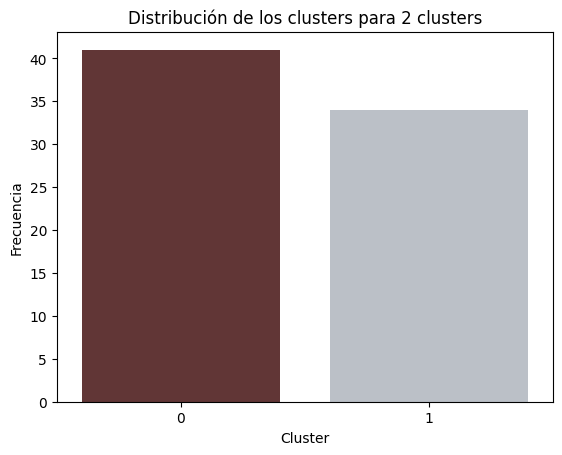

Frecuencia de observaciones para 3 clusters:
Cluster_3
0    29
2    27
1    19
Name: count, dtype: int64


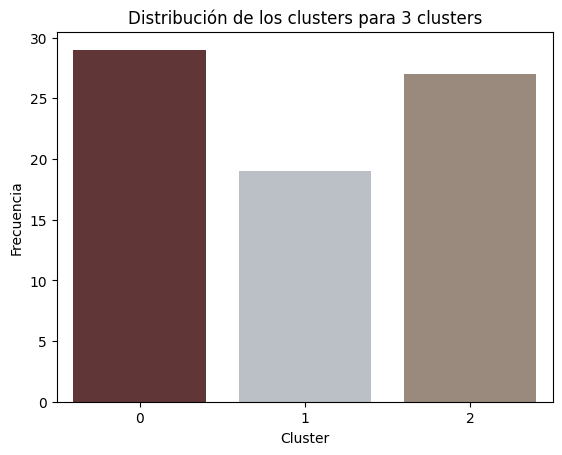

Frecuencia de observaciones para 4 clusters:
Cluster_4
3    26
2    18
1    17
0    14
Name: count, dtype: int64


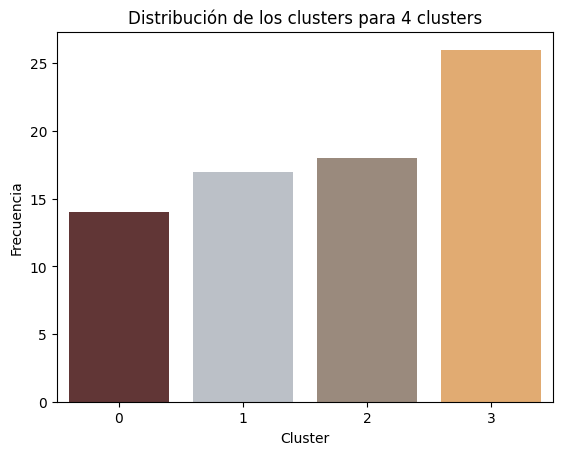

Frecuencia de observaciones para 5 clusters:
Cluster_5
3    26
1    16
2    13
0    12
4     8
Name: count, dtype: int64


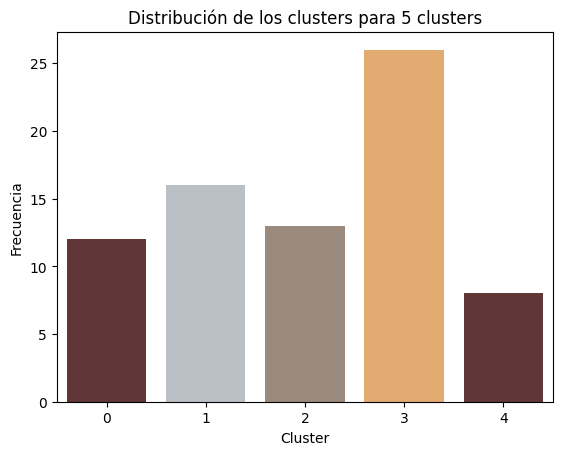

Frecuencia de observaciones para 6 clusters:
Cluster_6
3    18
4    17
5    16
2    11
0     7
1     6
Name: count, dtype: int64


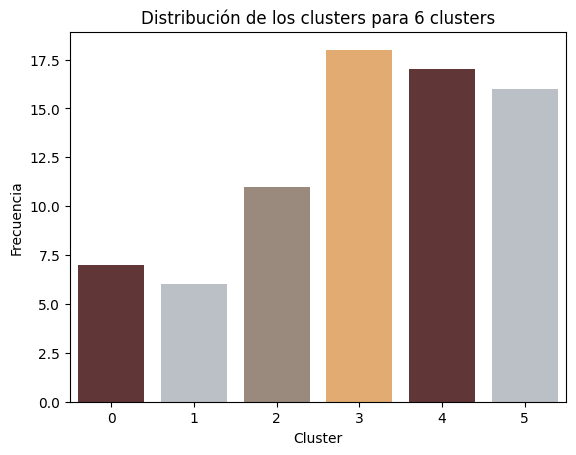

Frecuencia de observaciones para 7 clusters:
Cluster_7
1    20
6    18
0    15
2     8
3     5
5     5
4     4
Name: count, dtype: int64


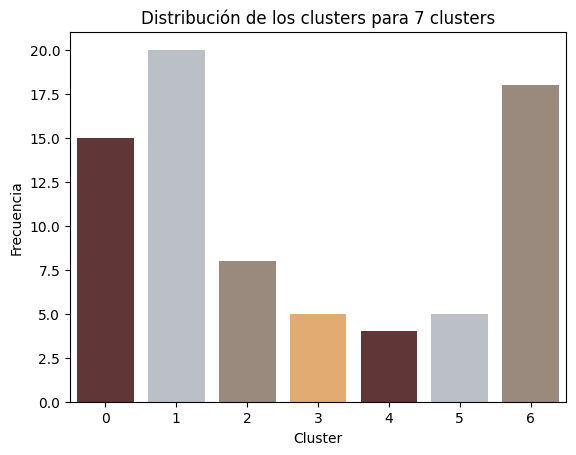

Frecuencia de observaciones para 8 clusters:
Cluster_8
2    17
6    16
4    11
1    11
5    10
3     4
7     3
0     3
Name: count, dtype: int64


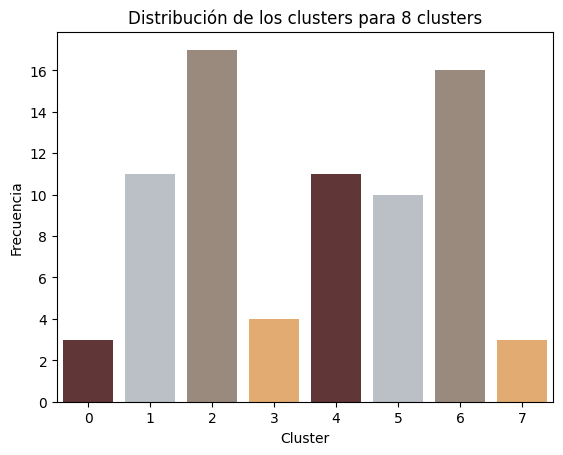

Frecuencia de observaciones para 9 clusters:
Cluster_9
6    17
2    13
4    13
5     8
1     7
8     6
3     6
0     3
7     2
Name: count, dtype: int64


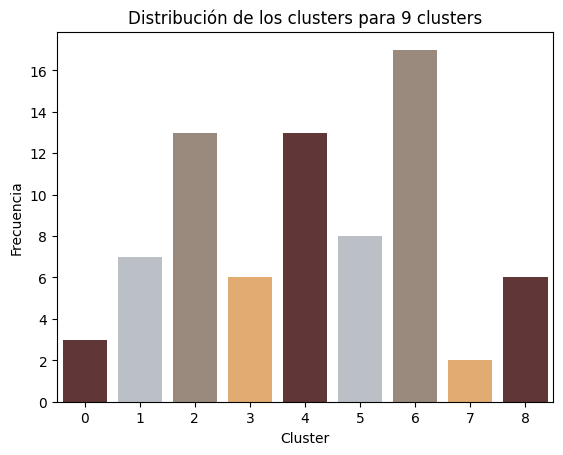

In [15]:
# calcular scores para 2 a 9 clusters

    # Calculate the evaluation indices.
#scores = {'Datos_kmeans': f'Datos_{1}_kmeans', 'Numero_Clusters': num_clusters,
        #  'init':best_params['init'], 'max_iter': best_params['max_iter']}

resultados = []  # Crear una lista vacía para almacenar los resultados

x_train_transposed.columns = x_train_transposed.columns.astype(str)

for i in range(2,10):
    kmeans3 = KMeans(n_clusters=i, init= 'k-means++', max_iter=100, random_state=1)  # Crea una instancia de KMeans
    kmeans3.fit(x_train_transposed) # Ajusta KMeans a tus datos
    labels2 = kmeans3.labels_  # Obtiene las etiquetas del ajuste actual de KMeans

    # Añadir las etiquetas al DataFrame como una nueva columna
    x_train_transposed['Cluster_' + str(i)] = labels2

    # Imprimir la frecuencia de observaciones por cluster
    print(f"Frecuencia de observaciones para {i} clusters:")
    print(x_train_transposed['Cluster_' + str(i)].value_counts())

    # Crear un histograma de las distribuciones
    pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
    sns.countplot(x=x_train_transposed['Cluster_' + str(i)], palette= pal)
    plt.title(f"Distribución de los clusters para {i} clusters")
    plt.xlabel("Cluster")
    plt.ylabel("Frecuencia")
    plt.show()

    # Crear un nuevo diccionario para almacenar los resultados de esta iteración
    scores = {}

    for index_name, index_func in evaluation_indices.items():
        score = index_func(x_train_transposed.drop(['Cluster_' + str(i)], axis=1), labels2)  # Usa las etiquetas actuales
        scores[index_name] = score

    # Calcular los índices de Dunn y Hopkins.
    dunn = dunn_index(x_train_transposed.drop(['Cluster_' + str(i)], axis=1), labels2)  # Usa las etiquetas actuales
    scores['Dunn Index'] = dunn

    # Añadir los resultados de esta iteración a la lista de resultados
    resultados.append(scores)

In [ ]:
#uy ojo.. que sin estandarizar la segunda vez están saliendo clusters distribuidos!!!

In [16]:
tabla_resultados = pd.DataFrame(resultados)
tabla_resultados

,Silhouette Coefficient,Calinski-Harabasz Index,Davies-Bouldin Index,Dunn Index
0,0.036592,3.761517,4.388995,0.362553
1,0.031666,3.374225,4.034580,0.390801
2,0.026310,2.803798,4.021648,0.636448
3,0.024253,2.482964,3.825555,0.642679
4,0.027938,2.425439,3.441516,0.621235
5,0.029409,2.302748,3.111648,0.666832
6,0.038069,2.293773,2.928001,0.650055
7,0.026918,2.088006,2.963506,0.394619


Otro paso: automatizar la selección del mejor número de clusters'

In [ ]:
'''Otro paso: automatizar la selección del mejor número de clusters'''

In [ ]:
x_train_transposed.to_csv('Datos_TFM_columnasclusters.csv', index=False)

In [ ]:
x_train_transposed.columns

In [ ]:
# Get the best model with the selected hyperparameters.
'''best_model = KMeans(**best_params)
best_model.fit(df_T_standard)
labels = best_model.labels_
num_clusters = len(set(labels))'''

In [ ]:
'''# Calculate the evaluation indices.
scores = {'Datos_kmeans': f'Datos_{1}_kmeans', 'Numero_Clusters': num_clusters,
          'init':best_params['init'], 'max_iter': best_params['max_iter']}
for index_name, index_func in evaluation_indices.items():
    score = index_func(df_T_standard, labels)
    scores[index_name] = score

# Calculate the Dunn and Hopkins indices.
dunn = dunn_index(df_T_standard, labels)
scores['Dunn Index'] = dunn


scores'''

In [ ]:
'''nueva_fila = pd.DataFrame([scores], columns=['Datos_kmeans', 'Numero_Clusters', 'init', 'max_iter']
                          + list(evaluation_indices.keys()) + ['Dunn Index'])

# Add the results to the dataframe
k_means_df = pd.concat([df_T_standard, nueva_fila], ignore_index=True)

# Save the results to a CSV file
k_means_df.to_csv('kmeans_results.csv', index=False)'''


In [ ]:
'''#Adding the Clusters feature to the original dataframe.
df_T_standard["clusters"]= best_model.fit_predict(df_T_standard)
df_T_standard["clusters"]= df_T_standard["clusters"].astype('category')

clusters_df = df_T_standard.copy()

# Save the results to a CSV file
#clusters_df.to_csv('clusters_results.csv', index=False)'''

In [17]:
## Crear un diccionario con las variables de nuestro cluster de elección:  clúster 8

unicos8 = x_train_transposed['Cluster_8'].unique()

diccionario8 = {}

for valor in unicos8:
    filas = x_train_transposed.index[x_train_transposed['Cluster_8'] == valor].tolist()
    diccionario8[valor] = filas

# Ver el diccionario
for clave, valor in diccionario8.items():
    print(f'Valor: {clave} - Filas: {valor}')

df_cluster8 = pd.DataFrame.from_dict(diccionario8, orient='index')
df_cluster8


Valor: 4 - Filas: ['X.STATE', 'MARITAL.5', 'RENTHOM1.2', 'RENTHOM1.3', 'EMPLOY1.4', 'EMPLOY1.6', 'X.IMPRACE.2', 'X.IMPRACE.3', 'X.IMPRACE.4', 'X.IMPRACE.5', 'X.IMPRACE.6']
Valor: 7 - Filas: ['SEXVAR', 'SEATBELT', 'EMPLOY1.5']
Valor: 1 - Filas: ['GENHLTH', 'HLTHPLN1', 'CHECKUP1', 'EXERANY2', 'SLEPTIM1', 'LASTDEN4', 'EDUCA', 'FLUSHOT7', 'X.INCOMG', 'MARITAL.1', 'RENTHOM1.1']
Valor: 2 - Filas: ['PHYSHLTH', 'MENTHLTH', 'POORHLTH', 'MEDCOST', 'ASTHMA3', 'ASTHNOW', 'ADDEPEV3', 'BLIND', 'DECIDE', 'DIFFDRES', 'DIFFALON', 'SMOKDAY2', 'FALL12MN', 'CIMEMLOS', 'MARITAL.4', 'EMPLOY1.3', 'EMPLOY1.8']
Valor: 6 - Filas: ['PERSDOC2', 'CVDSTRK3', 'CHCSCNCR', 'CHCOCNCR', 'CHCCOPD2', 'HAVARTH4', 'CHCKDNY2', 'RMVTETH4', 'DEAF', 'DIFFWALK', 'X.AGEG5YR', 'MARITAL.2', 'MARITAL.3', 'EMPLOY1.7', 'X.IMPRACE.1', 'VO_CORAZON']
Valor: 5 - Filas: ['CHILDREN', 'USENOW3', 'ALCDAY5', 'DRNK3GE5', 'MAXDRNKS', 'HIVRISK5', 'ECIGNOW', 'MARITAL.6', 'EMPLOY1.1', 'EMPLOY1.2']
Valor: 0 - Filas: ['WEIGHT2', 'HEIGHT3', 'BMI_WHO']

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
4,X.STATE,MARITAL.5,RENTHOM1.2,RENTHOM1.3,EMPLOY1.4,EMPLOY1.6,X.IMPRACE.2,X.IMPRACE.3,X.IMPRACE.4,X.IMPRACE.5,X.IMPRACE.6,None,None,None,None,None,None
7,SEXVAR,SEATBELT,EMPLOY1.5,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,GENHLTH,HLTHPLN1,CHECKUP1,EXERANY2,SLEPTIM1,LASTDEN4,EDUCA,FLUSHOT7,X.INCOMG,MARITAL.1,RENTHOM1.1,None,None,None,None,None,None
2,PHYSHLTH,MENTHLTH,POORHLTH,MEDCOST,ASTHMA3,ASTHNOW,ADDEPEV3,BLIND,DECIDE,DIFFDRES,DIFFALON,SMOKDAY2,FALL12MN,CIMEMLOS,MARITAL.4,EMPLOY1.3,EMPLOY1.8
6,PERSDOC2,CVDSTRK3,CHCSCNCR,CHCOCNCR,CHCCOPD2,HAVARTH4,CHCKDNY2,RMVTETH4,DEAF,DIFFWALK,X.AGEG5YR,MARITAL.2,MARITAL.3,EMPLOY1.7,X.IMPRACE.1,VO_CORAZON,None
5,CHILDREN,USENOW3,ALCDAY5,DRNK3GE5,MAXDRNKS,HIVRISK5,ECIGNOW,MARITAL.6,EMPLOY1.1,EMPLOY1.2,None,None,None,None,None,None,None
0,WEIGHT2,HEIGHT3,BMI_WHO,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,SMOKE100,LCSFIRST,LCSLAST,LCSNUMCG,None,None,None,None,None,None,None,None,None,None,None,None,None


In [20]:
diccionario8

{5: ['X.STATE',
  'MENTHLTH',
  'MEDCOST',
  'ADDEPEV3',
  'DECIDE',
  'SMOKDAY2',
  'HIVRISK5',
  'ECIGNOW',
  'MARITAL.4',
  'MARITAL.5',
  'MARITAL.6',
  'RENTHOM1.2',
  'RENTHOM1.3',
  'EMPLOY1.3',
  'EMPLOY1.4',
  'EMPLOY1.6',
  'X.IMPRACE.6'],
 6: ['SEXVAR',
  'HLTHPLN1',
  'PERSDOC2',
  'CHECKUP1',
  'LASTDEN4',
  'EDUCA',
  'SEATBELT'],
 2: ['GENHLTH',
  'CHILDREN',
  'MARITAL.1',
  'EMPLOY1.1',
  'EMPLOY1.5',
  'X.IMPRACE.2',
  'X.IMPRACE.3',
  'X.IMPRACE.5'],
 0: ['PHYSHLTH',
  'POORHLTH',
  'CVDSTRK3',
  'CHCCOPD2',
  'CHCKDNY2',
  'BLIND',
  'DIFFWALK',
  'DIFFDRES',
  'DIFFALON',
  'FALL12MN',
  'CIMEMLOS',
  'MARITAL.2',
  'EMPLOY1.8'],
 1: ['EXERANY2',
  'HEIGHT3',
  'USENOW3',
  'ALCDAY5',
  'DRNK3GE5',
  'MAXDRNKS',
  'X.INCOMG',
  'EMPLOY1.2'],
 3: ['SLEPTIM1',
  'CHCSCNCR',
  'CHCOCNCR',
  'HAVARTH4',
  'DIABAGE3',
  'RMVTETH4',
  'DEAF',
  'FLUSHOT7',
  'X.AGEG5YR',
  'X.AGE80',
  'MARITAL.3',
  'RENTHOM1.1',
  'EMPLOY1.7',
  'X.IMPRACE.1',
  'VO_CORAZON'],
 7: ['AS

In [19]:
diccionario8.values()

dict_values([['X.STATE', 'MENTHLTH', 'MEDCOST', 'ADDEPEV3', 'DECIDE', 'SMOKDAY2', 'HIVRISK5', 'ECIGNOW', 'MARITAL.4', 'MARITAL.5', 'MARITAL.6', 'RENTHOM1.2', 'RENTHOM1.3', 'EMPLOY1.3', 'EMPLOY1.4', 'EMPLOY1.6', 'X.IMPRACE.6'], ['SEXVAR', 'HLTHPLN1', 'PERSDOC2', 'CHECKUP1', 'LASTDEN4', 'EDUCA', 'SEATBELT'], ['GENHLTH', 'CHILDREN', 'MARITAL.1', 'EMPLOY1.1', 'EMPLOY1.5', 'X.IMPRACE.2', 'X.IMPRACE.3', 'X.IMPRACE.5'], ['PHYSHLTH', 'POORHLTH', 'CVDSTRK3', 'CHCCOPD2', 'CHCKDNY2', 'BLIND', 'DIFFWALK', 'DIFFDRES', 'DIFFALON', 'FALL12MN', 'CIMEMLOS', 'MARITAL.2', 'EMPLOY1.8'], ['EXERANY2', 'HEIGHT3', 'USENOW3', 'ALCDAY5', 'DRNK3GE5', 'MAXDRNKS', 'X.INCOMG', 'EMPLOY1.2'], ['SLEPTIM1', 'CHCSCNCR', 'CHCOCNCR', 'HAVARTH4', 'DIABAGE3', 'RMVTETH4', 'DEAF', 'FLUSHOT7', 'X.AGEG5YR', 'X.AGE80', 'MARITAL.3', 'RENTHOM1.1', 'EMPLOY1.7', 'X.IMPRACE.1', 'VO_CORAZON'], ['ASTHMA3', 'ASTHNOW', 'WEIGHT2', 'BMI', 'BMI_WHO'], ['SMOKE100', 'LCSFIRST', 'LCSLAST', 'LCSNUMCG', 'X.IMPRACE.4']])

In [ ]:
dict(zip(('a','b','c'),(11,44,77)))

In [18]:
'''crear otro diccionario que te de máximo 1/3 de la longitud del
diccionario original'''

diccionario_sizes=dict(zip(diccionario8,
            [max(1,int(len(g)/3)) for g in diccionario8.values()]))

#sobreescribimos y le decimos que coja máximo 1 vv de cada set
#diccionario_sizes=dict(zip(diccionario8,[1]*len(diccionario8)))
#diccionario_sizes

## Una estrategia: 
Coger los mejores representantes de cada cluster: que esas 6,1, 2... que coja de cada cluster, sean las que tengan la MI/corr() más alta con nuestro predictor, o quédate solo con la mitad de cada caja con corr()/MI más alta 


In [19]:
from sklearn.feature_selection import mutual_info_classif

# Contenedor para los mejores predictores de cada cluster
best_predictors = {}

# Diccionario de clusters
diccionario8  # Tu diccionario aquí

# df de variables predictoras
x_val_s  # Tu DataFrame aquí

for cluster_name, predictors in diccionario8.items():
    # Subconjunto de df para el cluster actual
    cluster = x_val_s[predictors]

    # Calcula la MI de cada feature en el cluster con el target
    mi = mutual_info_classif(cluster, y_val)
    
    # Crea un df con los resultados
    mi_df = pd.DataFrame({
        'variable': cluster.columns,
        'mi': mi
    })

    # Ordena el df por MI en orden descendente
    mi_df = mi_df.sort_values(by='mi', ascending=False)
    
    # Selecciona el 50% superior de las variables
    top_50_percent = mi_df[:len(mi_df)//2]
    
    # Número máximo de features a seleccionar basado en el tamaño del cluster
    max_predictors = min(len(cluster.columns), 6)
    
    # Selecciona las `max_predictors` variables con mayor Información Mutua
    top_predictors = top_50_percent[:max_predictors]
    
    # Agrega las mejores variables al diccionario de mejores predictores
    best_predictors[cluster_name] = top_predictors['variable'].tolist()

# Ahora `best_predictors` es un diccionario con los nombres de las mejores variables de cada cluster

In [20]:
best_predictors
#Esto ya hace que las combis se hagan con unas 35 vv en vez de con 78...

{4: ['RENTHOM1.2', 'MARITAL.5', 'X.IMPRACE.4', 'X.IMPRACE.5', 'EMPLOY1.6'],
 7: ['SEXVAR'],
 1: ['GENHLTH', 'CHECKUP1', 'EXERANY2', 'FLUSHOT7', 'MARITAL.1'],
 2: ['PHYSHLTH', 'EMPLOY1.8', 'DIFFALON', 'FALL12MN', 'DIFFDRES', 'DECIDE'],
 6: ['X.AGEG5YR',
  'DIFFWALK',
  'HAVARTH4',
  'RMVTETH4',
  'VO_CORAZON',
  'EMPLOY1.7'],
 5: ['EMPLOY1.1', 'MAXDRNKS', 'ALCDAY5', 'CHILDREN', 'DRNK3GE5'],
 0: ['BMI_WHO'],
 3: ['SMOKE100', 'LCSNUMCG']}

# Generación de combinaciones de regresores

In [36]:
#Definir el mínimo y máximo número de features predictoras que tendrá el modelo
#n_min=len(diccionario8)
#n_max=2*len(diccionario8)
n_min=2
n_max=10
n_min, n_max

(2, 10)

In [21]:
def get_custom_combinations(grouped_cols_list,max_sizes_list,n_min=None,n_max=None):

    """
    Generate all possible combinations of variables from the specified groups,
    while limiting the number of variables from each group based on max_sizes_list.
    Each combination must have at least n_min variables and at most n_max variables.

    :param grouped_cols_list: A list of lists, where each sublist represents a
    group of variables.
    :param max_sizes_list: A list of integers representing the maximum number
    of variables allowed from each group.
    :param n_max: The maximum total number of variables allowed in a combination.
    :param n_min: The minimum total number of variables allowed in a combination
    :return: A list of lists, where each sublist is a valid combination of variables.
    """

    def combinations_by_group_and_max_size(group,max_size):
        """
        Generate all combinations of variables in a group, with a maximum size
        of max_size.

        :param group: A list of variables.
        :param max_size: The maximum number of variables to include in a combination.
        :return: A list of lists, where each sublist is a combination of variables.
        """
        print(f"Group: {group}, type: {type(group)}")
        print(f"Max size: {max_size}, type: {type(max_size)}")
        return [list(c) for size in range(max_size+1) for c in combinations(group,size)]

    # Generate all valid combinations for each group:
    aux=list(map(lambda tuple_:combinations_by_group_and_max_size(*tuple_),
                 zip(grouped_cols_list,max_sizes_list)))

    # Generate all possible combinations of the combinations from each group:
    out=[list(chain(*g)) for g in product(*aux)]

    # Filter combinations to ensure they have between n_min and n_max variables:
    out=[o for o in out if (n_min is None or n_min<=len(o))
         and (n_max is None or len(o)<=n_max)]


    return out


In [37]:
# Estrategia de generar combinaciones con la selección previa en base a top valores MI

# con best_predictors

custom_combis = get_custom_combinations(list(best_predictors.values()),
                        list(diccionario_sizes.values()),n_min,n_max)


Group: ['RENTHOM1.2', 'DECIDE', 'MARITAL.5', 'SMOKDAY2', 'ADDEPEV3', 'X.IMPRACE.6'], type: <class 'list'>
Max size: 1, type: <class 'int'>
Group: ['CHECKUP1', 'PERSDOC2', 'SEXVAR'], type: <class 'list'>
Max size: 1, type: <class 'int'>
Group: ['GENHLTH', 'EMPLOY1.1', 'MARITAL.1', 'CHILDREN'], type: <class 'list'>
Max size: 1, type: <class 'int'>
Group: ['DIFFWALK', 'PHYSHLTH', 'DIFFALON', 'CHCKDNY2', 'EMPLOY1.8', 'POORHLTH'], type: <class 'list'>
Max size: 1, type: <class 'int'>
Group: ['EXERANY2', 'ALCDAY5', 'MAXDRNKS', 'X.INCOMG'], type: <class 'list'>
Max size: 1, type: <class 'int'>
Group: ['DIABAGE3', 'X.AGEG5YR', 'X.AGE80', 'RMVTETH4', 'HAVARTH4', 'EMPLOY1.7'], type: <class 'list'>
Max size: 1, type: <class 'int'>
Group: ['BMI_WHO', 'BMI'], type: <class 'list'>
Max size: 1, type: <class 'int'>
Group: ['SMOKE100', 'X.IMPRACE.4'], type: <class 'list'>
Max size: 1, type: <class 'int'>


In [38]:
#mirar numero de combinaciones

len(custom_combis)

308666

In [22]:
'''Función optimizada con un generador, que produce cada combinación
a medida que se solicite en lugar de todas a la vez'''

def get_custom_combinations_opt(grouped_cols_list, max_sizes_list, n_min=None, n_max=None):
    def combinations_by_group_and_max_size(group, max_size):
        for size in range(max_size+1):
            for c in combinations(group, size):
                yield list(c)

    # Generate all valid combinations for each group:
    aux=[combinations_by_group_and_max_size(group, max_size) 
        for group, max_size in zip(grouped_cols_list, max_sizes_list)]

    # Generate all possible combinations of the combinations from each group:
    for g in product(*aux):
        combined = list(chain(*g))

        # Filter combinations to ensure they have between n_min and n_max variables:
        if (n_min is None or n_min <= len(combined)) and (n_max is None or len(combined) <= n_max):
            yield combined

In [23]:
#Definir el mínimo y máximo número de features predictoras que tendrá el modelo
n_min=len(diccionario8)
n_max=2*len(diccionario8)
n_min, n_max

(8, 16)

In [24]:
custom_combis_opt = get_custom_combinations_opt(list(diccionario8.values()),
                        list(diccionario_sizes.values()),n_min,n_max)

custom_combis_opt

<generator object get_custom_combinations_opt at 0x00000293DA5895A0>

In [ ]:
['X.STATE', 'PHYSHLTH', 'MENTHLTH', 'POORHLTH', 'MEDCOST', 'CVDSTRK3', 'ASTHMA3', 'ASTHNOW', 'ADDEPEV3', 'DEAF', 'BLIND', 'DECIDE', 'DIFFWALK', 'DIFFDRES', 'DIFFALON', 'FALL12MN', 'HIVRISK5', 'CIMEMLOS', 'MARITAL.5', 'RENTHOM1.3', 'EMPLOY1.3', 'EMPLOY1.8', 'X.IMPRACE.5']
['SEXVAR', 'GENHLTH', 'HLTHPLN1', 'PERSDOC2', 'CHECKUP1', 'EXERANY2', 'SLEPTIM1', 'LASTDEN4', 'EDUCA', 'FLUSHOT7', 'SEATBELT', 'EMPLOY1.1', 'EMPLOY1.6']
['CHCSCNCR', 'CHCOCNCR', 'HAVARTH4', 'CHCKDNY2', 'X.AGEG5YR', 'X.AGE80', 'MARITAL.3', 'EMPLOY1.7', 'VO_CORAZON']
['CHCCOPD2', 'RMVTETH4', 'SMOKE100', 'SMOKDAY2', 'ECIGNOW', 'LCSLAST', 'LCSNUMCG', 'MARITAL.2', 'MARITAL.4', 'MARITAL.6', 'RENTHOM1.2', 'EMPLOY1.4', 'X.IMPRACE.4', 'X.IMPRACE.6']
['DIABAGE3', 'WEIGHT2', 'X.IMPRACE.2', 'BMI', 'BMI_WHO']
['CHILDREN', 'X.INCOMG', 'MARITAL.1', 'RENTHOM1.1', 'EMPLOY1.2', 'EMPLOY1.5', 'X.IMPRACE.1', 'X.IMPRACE.3']
['HEIGHT3', 'USENOW3', 'ALCDAY5', 'DRNK3GE5', 'MAXDRNKS', 'LCSFIRST']

In [ ]:
all_combis = [
    ['X.STATE', 'SEXVAR','CHCSCNCR','X.AGEG5YR'],
    ['X.STATE', 'SEXVAR','CHCSCNCR','X.AGEG5YR','CHILDREN'],
    ['X.STATE', 'SEXVAR','CHCSCNCR','X.AGEG5YR','HEIGHT3'],
]

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score
from tqdm import tqdm

In [ ]:
## Estrategia de V3

#RF pequeño, para evitar overfitting

hyperparameters = {'n_estimators':10,  # Número reducido de árboles
    'max_depth':5,  # Profundidad máxima limitada
    'min_samples_split':20,  # Mayor número mínimo de muestras para dividir un nodo
    'min_samples_leaf':10,
    'max_features': 'auto',
    'bootstrap': True,
    'oob_score':True}

                  
results = []

for combi in tqdm(custom_combis): #no falta la cross-validation?
    model = RandomForestClassifier(**hyperparameters)
    model.fit(x_train_s[combi], y_train)
    y_pred_train = model.predict(x_train_s[combi])
    y_pred_val = model.predict(x_val_s[combi])
    metadata = {
        "Combination":combi,
        "Hyperparameters":hyperparameters,
        "AccuracyTrain":accuracy_score(y_train, y_pred_train),
        "AccuracyTest":accuracy_score(y_val, y_pred_val),
        "PrecisionTrain":precision_score(y_train, y_pred_train),
        "PrecisionTest":precision_score(y_val, y_pred_val),
        "RecallTrain":recall_score(y_train, y_pred_train),
        "RecallTest":recall_score(y_val, y_pred_val),
        "AUCTrain":roc_auc_score(y_train, y_pred_train),
        "AUCTest":roc_auc_score(y_val, y_pred_val),
    }
    results.append(metadata)

results_table = pd.DataFrame.from_records(results)

#va a unas 30-40 combinaciones analizadas por minuto

In [42]:
results_table.head(10)

NameError: name 'results_table' is not defined

In [ ]:
# Obtener la combinación con el mejor valor en la métrica que nos interese
num_fila=results_table['AUCTest'].argmax()
results_table['Combination'].iloc[num_fila]

In [26]:
import sqlite3
import json

# Optimización computacional de la generación de combinaciones
Aplicar el generador en el bucle for y ir guardando los resultados en una tabla de sqllite, de tal manera que si interrumpes el bucle pq aun no ha acabado puedes consultar los resultados que llevabas de la tabla de sqllite

In [28]:
# Create DB with results
connection = sqlite3.connect("data/results.db")
cursor = connection.cursor()

cursor.execute(
    """
    CREATE TABLE IF NOT EXISTS results(
    Combination TEXT,
    Hyperparameters TEXT,
    AccuracyTrain REAL,
    AccuracyTest REAL,
    PrecisionTrain REAL,
    PrecisionTest REAL,
    RecallTrain REAL,
    RecallTest REAL,
    AUCTrain REAL,
    AUCTest REAL)
    """
)

In [ ]:
# Ejemplo para reiniciar la tabla si no se quieren usar los resultados previos
cursor.execute(
    "DELETE FROM results"
)

In [29]:
# Example select
cursor.execute(
    "SELECT * FROM results"
).fetchall()

[]

In [30]:
#RF pequeño, para evitar overfitting

hyperparameters = {}
'''n_estimators':10,  # Número reducido de árboles
    'max_depth':5,  # Profundidad máxima limitada
    'min_samples_split':20,  # Mayor número mínimo de muestras para dividir un nodo
    'min_samples_leaf':10,
    'max_features': 'auto',
    'bootstrap': True,
    'oob_score':True
                  '''
results = []

for combi in tqdm(custom_combis_opt): #no falta la cross-validation?
    model = RandomForestClassifier(**hyperparameters)
    model.fit(x_train_s[combi], y_train)
    y_pred_train = model.predict(x_train_s[combi])
    y_pred_val = model.predict(x_val_s[combi])
    metadata = {
        "Combination":combi,
        "Hyperparameters":hyperparameters,
        "AccuracyTrain":accuracy_score(y_train, y_pred_train),
        "AccuracyTest":accuracy_score(y_val, y_pred_val),
        "PrecisionTrain":precision_score(y_train, y_pred_train),
        "PrecisionTest":precision_score(y_test, y_pred_val),
        "RecallTrain":recall_score(y_train, y_pred_train),
        "RecallTest":recall_score(y_test, y_pred_val),
        "AUCTrain":roc_auc_score(y_train, y_pred_train),
        "AUCTest":roc_auc_score(y_test, y_pred_val),
    }
    cursor.execute(
        f"""
        INSERT INTO results VALUES
        (
            '{json.dumps(combi)}',
            '{json.dumps(hyperparameters)}',
            {metadata["AccuracyTrain"]},
            {metadata["AccuracyTest"]},
            {metadata["PrecisionTrain"]},
            {metadata["PrecisionTest"]},
            {metadata["RecallTrain"]},
            {metadata["RecallTest"]},
            {metadata["AUCTrain"]},
            {metadata["AUCTest"]}
        )
        """
    )
    results.append(metadata)

results_table = pd.DataFrame.from_records(results)


74it [35:54, 29.12s/it]


KeyboardInterrupt: 

In [31]:
results_table_sql = pd.read_sql("SELECT * FROM results", connection)
results_table_sql["Combination"] = results_table_sql["Combination"].apply(json.loads)
results_table_sql["Hyperparameters"] = results_table_sql["Hyperparameters"].apply(json.loads)
results_table_sql

,Combination,Hyperparameters,AccuracyTrain,AccuracyTest,PrecisionTrain,PrecisionTest,RecallTrain,RecallTest,AUCTrain,AUCTest
0,"[PERSDOC2, CVDSTRK3, CHCSCNCR, CHILDREN, USENO...",{},0.875636,0.855040,0.784310,0.137772,0.125634,0.019014,0.560079,0.499985
1,"[PERSDOC2, CVDSTRK3, CHCSCNCR, CHILDREN, USENO...",{},0.875231,0.856583,0.800961,0.144290,0.117257,0.017012,0.556319,0.500433
2,"[PERSDOC2, CVDSTRK3, CHCSCNCR, CHILDREN, USENO...",{},0.875896,0.856571,0.818563,0.146532,0.119458,0.017103,0.557630,0.500581
3,"[PERSDOC2, CVDSTRK3, CHCSCNCR, CHILDREN, USENO...",{},0.875009,0.856659,0.802308,0.147426,0.114780,0.017194,0.555148,0.500641
4,"[PERSDOC2, CVDSTRK3, CHCSCNCR, CHILDREN, USENO...",{},0.867972,0.858679,0.801683,0.110912,0.046597,0.005640,0.522385,0.499202
...,...,...,...,...,...,...,...,...,...,...
69,"[PERSDOC2, CVDSTRK3, CHCSCNCR, CHILDREN, USENO...",{},0.864830,0.861365,0.649321,0.149425,0.026325,0.005913,0.512036,0.500263
70,"[PERSDOC2, CVDSTRK3, CHCSCNCR, CHILDREN, USENO...",{},0.865328,0.861089,0.670869,0.148073,0.030912,0.006641,0.514254,0.500263
71,"[PERSDOC2, CVDSTRK3, CHCSCNCR, CHILDREN, USENO...",{},0.864659,0.861692,0.635807,0.167095,0.025408,0.005913,0.511551,0.500598
72,"[PERSDOC2, CVDSTRK3, CHCSCNCR, CHILDREN, USENO...",{},0.869332,0.858215,0.745333,0.144660,0.068367,0.013555,0.532332,0.500364


In [ ]:
results_table

In [32]:
# Obtener la combinación con el mejor valor en la métrica que nos interese
num_fila=results_table_sql['AUCTest'].argmax()
results_table_sql['Combination'].iloc[num_fila]

['PERSDOC2',
 'CVDSTRK3',
 'CHCSCNCR',
 'CHILDREN',
 'USENOW3',
 'ALCDAY5',
 'BMI_WHO',
 'SMOKE100']

In [ ]:
np.unique(y_pred_train)

Quizá seria interesante reducir el tamaño del dataset a nivel de filas para agilizar el entrenamiento de estos pequeños modelos.

In [ ]:
# Obtener la combinación con el mejor valor en la métrica que nos interese
num_fila=results_table['AUCTest'].argmax()
results_table['Combination'].iloc[num_fila]

In [ ]:
## mirar otro número de clusters: 5

unicos5 = df_standard_T['Cluster_5'].unique()

diccionario5 = {}

for valor in unicos5:
    filas = df_standard_T.index[df_standard_T['Cluster_5'] == valor].tolist()
    diccionario5[valor] = filas

# Ver el diccionario
for clave, valor in diccionario5.items():
    print(f'Valor: {clave} - Filas: {valor}')

df_cluster5 = pd.DataFrame.from_dict(diccionario5, orient='index')
df_cluster5
#este parece que tiene menos sentido